<a href="https://colab.research.google.com/github/natanael-santosd/Final-Project-Fusemachines/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **An Example of Emotion Detection and Topic Modeling Analysis of Crime News Comments on Instagram: The Paula Santana's Case**
#### By Natanael Santos Delgado

# Introduction

In this project, I am trying to find out what are the most common reactions of the Dominican users of IG when prompted crime news. I am analyzing the case of Paula Santana, who was the victim of two co-workers (killed in her job); one of them she had reported for harassment, but Human Resources didn't take it seriously. These kind of news always cause a strong reaction from the public, so I think it should be interesting to analyze these comments and try to establish the public's position on how to adress these issues, how it affects security concerns, especially for women, and a reflection on the victim's validation: people care more about victim's that are young, students, beautiful, etc. rather than the nature of the crime.

For emotion detection, I use a Support Vector Machine (SVM) classifier trained on TF-IDF vectors of comment text and for topic modeling, I use Latent Dirichlet Allocation (LDA). I also use a Multinomial Naive Bayes classifier to classify comments into sentiment categories such as positive, negative, or neutral or just how strong the negative reactions were.

One of the main challenges was the data collection, because web scraping for IG web seems to be very difficult, hence, many researchers prefer to extract comments from Twitter. I decided to use APIFY's instagram scraper for small news and excel cleaning for the mainstream media news. Also, the scope of my research questions might not be answered by the applied methods.

# 1. Literature Review

## 1.1. Discourse Analysis

The International Encyclopedia of Education (2023) defines **discourse analysis** as "*the epistemological framework for investigating discourse which allows it to approach the variety of discursive genres and to describe the complexity of the discourse and of the interaction*".

However, discourse analysis has been traditionally a qualitative research approach, that aims to extract social meaning from the study of the use of the language, according to Melissa N.P. Johnson, Ethan McLean (2020). The authors also mention *that researchers in the field typically view language as a form of social practice that influences the social world, and vice versa*.

https://www.sciencedirect.com/science/article/abs/pii/S0747563216305209

https://www.sciencedirect.com/science/article/abs/pii/S0010945220301854

https://aclanthology.org/P19-4003/

## 1.2 Machine Learning Methods for Discourse Analysis



## 1.3 Emotion Detection and Topic Modeling

Sentiment can be classified as feeling, emotion or opinion of a person towards something such as situation or events. Emotions constitute a key element in human instinct and behaviour as it can be communicated through different media, for example, speech, facial expressions, gestures and textual information.

Emotion can be expressed in many ways that can be seen such as facial expression and gestures, speech and by written text. Emotion Detection in text documents is essentially a content - based classification problem involving concepts from the domains of Natural Language Processing as well as Machine Learning.

https://arxiv.org/abs/1205.4944

## 2. Emotion Detection and Topic Modeling for Crime News

*People can express their opinions using texts, symbols, pictures and emoticons via Facebook posts and comments. These expressions allow sentiment analysis to be performed by collecting the data to obtain the public’s opinions and emotions toward certain issues*.

*Social media permits the interchange and establishment of usergenerated content (UGC) and it is described as a set of web-based program that was established on the technological and ideological basis of Web 2.0 [1]. It is also known as a group of new media that permit social interaction between users [2] and it is undeniably a vital part in social and political developments [3]. People are allowed to spread data, opinions, statements and behavior via the social media [4]. One of the important issues is crime where public’s emotions, impressions, viewpoints and judgments regarding crime can be affected by social media [5]. In addition, people tend to rely upon resources published by the media production in observing crime topics [6]*.

https://ieeexplore.ieee.org/abstract/document/7023387

https://www.academia.edu/download/70126212/14309.pdf



## 3. Violent Crime in the Dominican Republic



Let's now explore the Case of Paula Santana, a young student who was killed in the installations of her job by two coworkers. One of whom she had reported for harassment and Human Resources did not take it seriously.

This is one the news from Diario Libre, one the two main printed newspapers in the Dominican Republic. In this report, the newspaper provides some context and information about the victim.

# Mainstream Media Coverage

**Author:** Diario Libre \
**Date:** February 23\
**Original Language:** Spanish \
**Link:** https://www.instagram.com/p/C3s9_RvvPla/ \
**Number of Likes:** 12,023 \
**Number of Comments:** 658 (498) \

**Text of the News:**

Faltaban pocos meses para que Paula Santana Escalante convirtiera en realidad su sueño: ser una azafata. Sin embargo, todo se desvaneció tras encontrar su cuerpo sin vida a las afueras de la empresa donde trabajaba en la zona franca de Las Américas, en Santo Domingo Este. A pesar de contar con pocos recursos, nunca consideró abandonar sus estudios ni renunciar a su sueño de ser azafata para poder sacar adelante a su familia. La joven era estudiante de Inter Aviation Services (Iasca). Con tristeza, sus familiares expresaron que la determinación y entrega de Paula hacía que sus familiares la vieran como un ejemplo a seguir. El principal sospechoso de su muerte es un compañero de trabajo, quien, según sus parientes, la acosaba. Pese a que denunció la situación en el departamento de Recursos Humanos de la empresa Integer Holdings Corporation, estos habrían hecho caso omiso. \

**English Translation:**

A few months were left for Paula Santana Escalante to make her dream a reality: to become a flight attendant. However, everything vanished after her lifeless body was found on the outskirts of the company where she worked in the Las Américas free zone, in Santo Domingo Este. Despite having few resources, she never considered abandoning her studies or giving up her dream of becoming a flight attendant to support her family. The young woman was a student at Inter Aviation Services (Iasca). With sadness, her relatives expressed that Paula's determination and dedication made her a role model for her family members. The main suspect in her death is a coworker, who, according to her relatives, harassed her. Although she reported the situation to the Human Resources department of the company Integer Holdings Corporation, they allegedly ignored it.


## 2. Exploratory Data Analysis (EDA)

### 2.1 Data Source

The Instagram comments were extracted by copying the entire page (CTRL + A) and pasting all elements in Excel. To clean the data to only have the comments, these Excel features were applied:

- Alt + F5 to select specific elements and delete them. At first, delete all objects (images).
- Excel VBA formula was applied to select all cells that contained hyperlinks (instagram functionalities, such as "see more", "respond", etc. appeared with hyperlinks).
- Finally, Filtering was applied to select only cells with values and copying them in a clean worksheet.


From this process, the clean dataset was obtained with only main comments (no responses) and an ID column was added.

The reason why this approach was chosen is because Instagram Web is very difficult for web scraping, so in this case using Excel was more suitable for the matter.

In [ ]:
# Importing required libraries
import pandas as pd
from textblob import TextBlob
import emoji as emoji
import nltk as nltk
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
nltk.download('wordnet')

# Loading the dataset
df = pd.read_csv('diariolibre1.csv')
df['data'] = df['data'].astype('str')

# Let's see the structure of the dataset
df.head()

### 2.2 Data Visualization

#### 2.2.1 Bar Chart and Word Cloud

Let's visualize the most frequent non-stop words in the dataset.

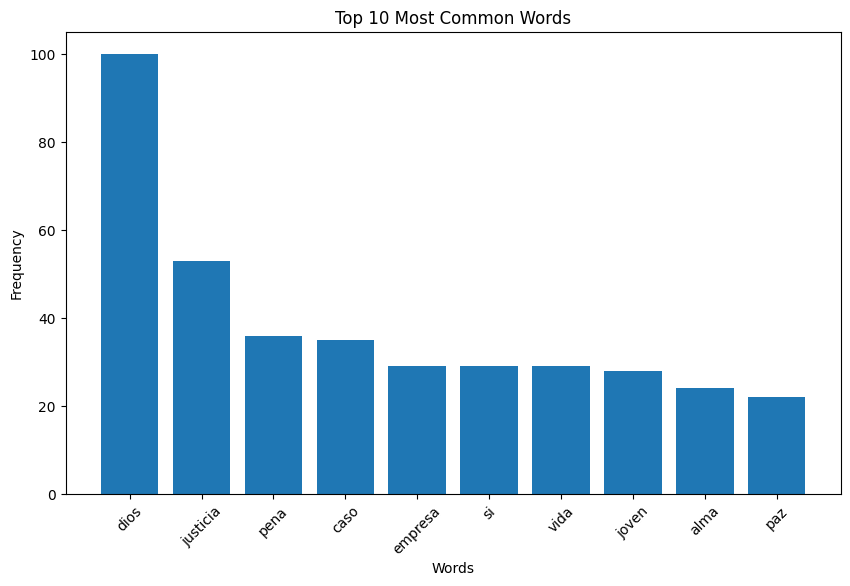

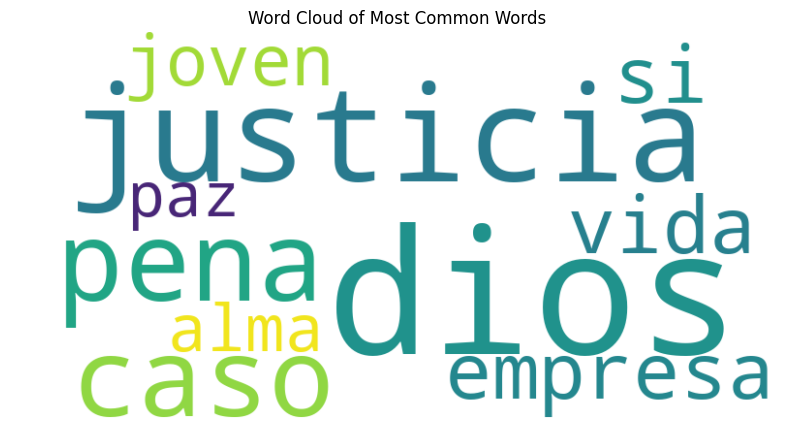

In [95]:
# Function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens]
    stop_words = set(stopwords.words('spanish'))
    tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    return tokens

# Preprocess comments column
df['preprocessed_comments'] = df['data'].apply(preprocess_text)

# Flatten the list of tokens
tokens = [token for sublist in df['preprocessed_comments'] for token in sublist]

# Count word frequencies
word_freq = Counter(tokens)

# Get the most common words
most_common_words = word_freq.most_common(10)

# Plot word frequencies
plt.figure(figsize=(10, 6))
words, frequencies = zip(*most_common_words)
plt.bar(words, frequencies)
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()

From this results, we can interpret these words and extrapolate their meaning in this context:

1. Dios - God: The Dominican Republic is a religious country, with Christianism as the most important religion. Expressions like "Oh, God", "Oh, my God" or regular condolences

2. Justicia - Justice: As we would expect, this was a very solid case in terms of the precedents and the nature of the crime, so people would naturally be expecting a fast-clear outcome. But, it could also be a result of the social perception of the Justice's System. People might feel that if there are no strong demands for "justice" to be applied, a case might not be solved.

3. Caso - Case: This is also following the previous idea, which provides more evidence for the reaction of demanding "justice".

4. Pena - Sad or Sentence (Law): In this case, this word might refer to "the feeling of profound sadness" or "the punishment imposed according to the law by judges or courts on those responsible for a crime or offense" (Real Academia de la Lengua Española).

5. Si - If. Probably due to the large amount of conditional statements.

6. Vida - Life.

7. Empresa - Company: Many comments might have been blaming and attacking the company for the way they handled the harassment complaint made by the victim.

8. Joven - Young: The victim was young and it might be one of the biggest shocks and concerns.

9. Alma - Soul: Religion and beliefs from the Dominican population again reflected here.

10. Pobre - Poor: Could refer to beein economically "poor" or feeling sad for the "poor" victim.



### 2.3 Collocation Analysis

In [99]:
import nltk
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
from nltk.tokenize import word_tokenize

# Top 10 words
top_words = ['dios', 'justicia', 'caso', 'pena', 'si', 'vida', 'empresa',
             'joven','alma','pobre']

# Tokenize comments
tokenized_comments = [word_tokenize(comment.lower()) for
                      comment in df['data']]

# Flatten the list of tokens
all_tokens = [token for comment_tokens in tokenized_comments for
              token in comment_tokens]

# Filter tokens that are not in the top words list
filtered_tokens = [token for token in all_tokens if
                   token in top_words]

# Create bigrams from filtered tokens
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(filtered_tokens)

# Compute top collocations
top_collocations = finder.nbest(bigram_measures.raw_freq, 10)

print("Top collocations:")
for collocation in top_collocations:
    print(collocation)


Top collocations:
('dios', 'dios')
('justicia', 'dios')
('dios', 'justicia')
('dios', 'pena')
('pena', 'dios')
('vida', 'dios')
('dios', 'caso')
('alma', 'dios')
('dios', 'empresa')
('justicia', 'joven')


### 2.4 Concordance Analysis

Now, let's apply concordance analysis to the top 10 words identified in the word frequency graph. This perspective would allow us to see the top words in context, to spot how they usually appear in the text.

In [102]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.text import ConcordanceIndex

# Top 10 words
top_words = ['dios', 'justicia', 'caso', 'pena', 'si', 'vida', 'empresa',
             'joven','alma','pobre']

# Tokenize comments
df['tokens'] = df['data'].apply(lambda x: word_tokenize(x.lower()))

# Concatenate tokens from all comments
all_tokens = [token for tokens in df['tokens'] for token in tokens]

# Perform concordance analysis for each top word
print("Concordance analysis for top 10 words:")
for word in top_words:
    concordance_index = ConcordanceIndex(all_tokens)
    concordance_index.print_concordance(word, width=50)
    print("\n")

Concordance analysis for top 10 words:
Displaying 25 of 100 matches:
s otros en este país . dios mio , como apagaron el
lto y no la dejaron ay dios , esa noticia me ha ca
nosé ahí hay algo raro dios que impotencia pobre c
o podía cumplirlo papá dios líbrame padre esa tarj
iene aterrada qué pena dios mío toma el control de
ora y casi profesional dios que dolor tiene el pue
nga que hacer justicia dios mio ten misericordia d
s sólo tengo que decir dios me libre , porque yo c
esto da una impotencia dios mio pobre chica dios n
a dios mio pobre chica dios nos libre nuestros hij
 puede quedar impune . dios ! que pena deben sanci
ación muy lamentable . dios mío justicia para esa 
 quejas te despiden ay dios , pero que caso tan tr
o tan triste ! ! ! que dios muestre los culpables 
n paz ! ! ! pobre niña dios mio wow que pena . que
delante justicia ! que dios la tenga en gloria dio
ios la tenga en gloria dios mio ya ni trabajando s
doctor bye ️ que abuso dios mío k pena dios mío ! 
 abuso dios m

## 3. Sentiment Analysis

### 3.1. Data Preprocessing

Now, it would be interesting to convert all emojis into text, in order to include comments with only emojis in the analysis.

This is a source of bias, since I will be defining the meaning, and maybe people did not have that intention or might not be exactly what they meant.

In [90]:
df = pd.read_csv('diariolibre1.csv')
df['data'] = df['data'].astype('str')

# Function to extract emojis from a string
def extract_distinct_emojis(text):
    return emoji.distinct_emoji_list(text)

# Apply the function to each value in the 'data' column
emojis_list = df['data'].apply(extract_distinct_emojis)

# Aggregate all extracted emojis into a single list
all_emojis = [emoji for sublist in emojis_list for emoji in sublist]

# Obtain unique emojis
unique_emojis = list(set(all_emojis))

print("Unique List of Emojis:")
print(unique_emojis)

emoji_mapping = {
    '🙌':'',
    '🫂':'',
    '😩':'',
    '😂':'',
    '🌹':'',
    '🥲':'',
    '💜':'',
    '☹️':'',
    '😳':'',
    '🔥':'',
    '🖤':'',
    '😔':'',
    '💰':'',
    '👀':'',
    '😄':'',
    '🙏🏻':'',
    '😖':'',
    '🇩🇴':'',
    '👏':'',
    '😞':'',
    '🙈':'',
    '⚖️':'',
    '😒':'',
    '\U0001f979':'',
    '👿':'',
    '😢':'',
    '❤️':'',
    '😇':'',
    '😮':'',
    '🙃':'',
    '😦':'',
    '🕯':'',
    '😍':'',
    '🤬':'',
    '🕊':'',
    '🙊':'',
    '😪':'',
    '🧑\u200d🎨':'',
    '🙏🏼':'',
    '❤':'',
    '🌎':'',
    '✝️':'',
    '😭':'',
    '🙏':'',
    '🐀':'',
    '🎥':'',
    '🙉':'',
    '🥺':'',
    '😡':'',
    '🕊️':'',
    '😥':'',
    '🤔':'',
    '👎':'',
    '💔':''
}

def all_emojis(dataset):
  """Iterates over the dataset and extract all strings that contain
     an emoji.
  """
  processed_text = ""
  for char in dataset:
    if char in emoji_mapping:
      processed_text += emoji_mapping[char]
    else:
      processed_text += char
  return processed_text

df['data'] = df['data'].apply(all_emojis)
print(df)

df_emoji = pd.read_csv('diariolibre1.csv')
df_emoji['data'] = df_emoji['data'].astype('str')

emoji_mapping_2 = {
    '🙌':'esperanza',
    '🫂':'abrazo',
    '😩':'angustia',
    '😂':'',
    '🌹':'rosa',
    '🥲':'llorar',
    '💜':'esperanza',
    '☹️':'llorar',
    '😳':'asombro',
    '🔥':'',
    '🖤':'esperanza',
    '😔':'pena',
    '💰':'dinero',
    '👀':'observar',
    '😄':'',
    '🙏🏻':'esperanza',
    '😖':'pena',
    '🇩🇴':'',
    '👏':'aplauso',
    '😞':'dolor',
    '🙈':'',
    '⚖️':'justicia',
    '😒':'cansancio',
    '\U0001f979':'',
    '👿':'enojo',
    '😢':'dolor',
    '❤️':'esperanza',
    '😇':'angel',
    '😮':'sorpresa',
    '🙃':'enojo',
    '😦':'sorpresa',
    '🕯':'paz',
    '😍':'',
    '🤬':'enojo',
    '🕊':'descansa en paz',
    '🙊':'enojo',
    '😪':'dolor',
    '🧑\u200d🎨':'',
    '🙏🏼':'orar',
    '❤':'esperanza',
    '🌎':'mundo',
    '✝️':'Dios',
    '😭':'llorar',
    '🙏':'orar',
    '🐀':'raton',
    '🎥':'pelicula',
    '🙉':'',
    '🥺':'llorar',
    '😡':'enojo',
    '🕊️':'descansa en paz',
    '😥':'tristeza',
    '🤔':'pensar',
    '👎':'disgusto',
    '💔':'corazon roto'
}

def all_emojis_emoji(dataset):
  """Iterates over the dataset and extract all strings that contain
     an emoji.
  """
  processed_text = ""
  for char in dataset:
    if char in emoji_mapping_2:
      processed_text += emoji_mapping_2[char]
    else:
      processed_text += char
  return processed_text

df_emoji['data'] = df_emoji['data'].apply(all_emojis_emoji)
print(df_emoji)

Unique List of Emojis:
['🤬', '🙏', '😦', '😔', '😡', '👏', '😖', '👿', '😩', '🖤', '🙏🏼', '🙈', '🇩🇴', '😢', '🕊', '🥲', '🙉', '🎥', '❤', '🕊️', '🫂', '☹️', '🙌', '😥', '💔', '😂', '😮', '💰', '🙃', '🤔', '🕯', '😪', '😍', '😳', '😇', '✝️', '🙏🏻', '🙊', '🌹', '🥺', '👀', '💜', '🧑\u200d🎨', '\U0001f979', '😭', '⚖️', '😄', '🔥', '👎', '🌎', '🐀', '❤️', '😞', '😒']
      id                                               data
0      0  No podemos dejar de hacer sonar el caso, hay q...
1      1  Y según la empresa, las cámaras del entorno do...
2      2     Dios mio, como apagaron el sueño de esa joven,
3      3  A ley de 4 meses paulita para graduarnos y mir...
4      4  Que raro que no se han filtrado fotos del acos...
..   ...                                                ...
495  495  Lo malo de este país que orita suertan.ese hij...
496  496  Esa muchacha faja trabajando y pagándose su ca...
497  497                             Hay Dios mío que dolor
498  498  Yo solo digo que eso está bien turbio, alguien...
499  499  Y la justici

#

In [91]:
# Perform sentiment analysis on each comment
sentiment_scores = []
for index, row in df.iterrows():
    comment_text = row['data']
    blob = TextBlob(comment_text)
    sentiment_score = blob.sentiment.polarity
    sentiment_scores.append(sentiment_score)

# Aggregate sentiment scores to get an overall
# sentiment score for the crime news post
overall_sentiment_score = sum(sentiment_scores) / len(sentiment_scores)

print("Overall Sentiment Score:", overall_sentiment_score)

Overall Sentiment Score: -0.011333333333333334


After receiving a close-to-zero overall sentime score, I suspect that the algorithm doesn't work well on this dataset. Hence, I will check different comments individually to judge whether the result is acceptable.

In [ ]:
# This comment transates to: "What a tragedy, everyone involved should be in
# jail, even the security officer, until everything it's clear
# and justice is done!"
comment_text = "Que pena, ahí debe de estar preso hasta el seguridad hasta que todo se aclare y se haga justicia!"
blob = TextBlob(comment_text)
sentiment_score = blob.sentiment.polarity
print(sentiment_score)
# We get a sentime score of 0.0, showing it's neutral.

0.0


In [ ]:
# This comment transates to: "What a tragedy, everyone involved should be in
# jail, even the security officer, until everything it's clear
# and justice is done!"
comment_text = "Que pena, ahí debe de estar preso hasta el seguridad hasta que todo se aclare y se haga justicia!"
blob = TextBlob(comment_text)
sentiment_score = blob.sentiment.polarity
print(sentiment_score)
# We get a sentime score of 0.0, showing it's neutral.

In [103]:
# This comment transates to: "What a tragedy, everyone involved should be in
# jail, even the security officer, until everything it's clear
# and justice is done!"
comment_text = "Diantre pobre muchacha no pudo realizar sus sueños 😢😔por unos azarosos…"
blob = TextBlob(comment_text)
sentiment_score = blob.sentiment.polarity
print(sentiment_score)
# We get a sentiment score of 0.0, showing it's neutral.

0.0


In [ ]:
# This comment transates to: "What a tragedy, everyone involved should be in
# jail, even the security officer, until everything it's clear
# and justice is done!"
comment_text = "Que pena, ahí debe de estar preso hasta el seguridad hasta que todo se aclare y se haga justicia!"
blob = TextBlob(comment_text)
sentiment_score = blob.sentiment.polarity
print(sentiment_score)
# We get a sentime score of 0.0, showing it's neutral.

In [ ]:
# This comment transates to: "What a tragedy, everyone involved should be in
# jail, even the security officer, until everything it's clear
# and justice is done!"
comment_text = "Que pena, ahí debe de estar preso hasta el seguridad hasta que todo se aclare y se haga justicia!"
blob = TextBlob(comment_text)
sentiment_score = blob.sentiment.polarity
print(sentiment_score)
# We get a sentime score of 0.0, showing it's neutral.

## Topic Modeling Analysis with LDA Model

To perform Modelin Analysis on the comments, a LDA model was applied.

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
import pandas as pd

df = pd.read_csv('diariolibre1.csv')
df['data'] = df['data'].astype('str')

# Function to preprocess text and remove stop words
def preprocess_and_remove_stopwords(text):
    tokens = text.split()
    cleaned_tokens = [token.lower().strip('.,?!') for
                      token in tokens
                      if token.lower().strip('.,?!')
                      not in stopwords.words('spanish')]
    return ' '.join(cleaned_tokens)

# Preprocess comments and remove stop words
df['data'] = df['data'].apply(preprocess_and_remove_stopwords)

# Vectorize the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['data'])

# Train the LDA model
lda_model = LatentDirichletAllocation(n_components=10, max_iter=10,
                                      learning_method='online',
                                      random_state=42)
lda_model.fit(X)

# Get the top words for each topic
def get_top_words(model, feature_names, n_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_words.append([feature_names[i]
                          for i in topic.argsort()[:-n_top_words - 1:-1]])
    return top_words

n_top_words = 10  # Number of top words to display for each topic
feature_names = vectorizer.get_feature_names_out()

# Display top words for each topic
top_words = get_top_words(lda_model, feature_names, n_top_words)
for i, words in enumerate(top_words):
    print(f"Topic {i + 1}: {' '.join(words)}")

Topic 1: impune quede así justicia caso nuriapiera aliciaortegah puede quedar joven
Topic 2: política rd antemano viene veces van ocultado legislativos dirige leyes
Topic 3: si empresa humanos familia debe recursos justicia caso foto sociedad
Topic 4: paz alma joven justicia dios país familia caso lamentable muerte
Topic 5: misericordia dios ten señor padre mundo amado oh familiares líbranos
Topic 6: saber amén violada seguro dejó olvido quiénes asesino tecnología violador
Topic 7: pena dios vida pobre caso sueños triste da muerte joven
Topic 8: dios justicia mio haga nadie país hijo libre tanta padre
Topic 9: mundo personas investiguen si serca jóvenes valores niños malas evitar
Topic 10: justicia empresa pueblo joven vida raro debe cámaras divina cámara


The results of the model provide more context into why the most common words were found in the descrptive analysis.

The topic 1 shows that when people talk about "justice" they also are worried about "impunity", or the case not being solved. They also mention "Alicia Ortega" and "Nuria Piera", who are the most influential journalists of the country, receiving a lot of respect from the population. Both have investigated many cases of different nature and have provided sufficient evidence to make a case.

In this sense, we can sense how people perceive the Justice System as being so weak that they expect third-parties to participate and help solve the case.

The second topic is interesting, and could be a starting point to

### Network Graph of Top Topics

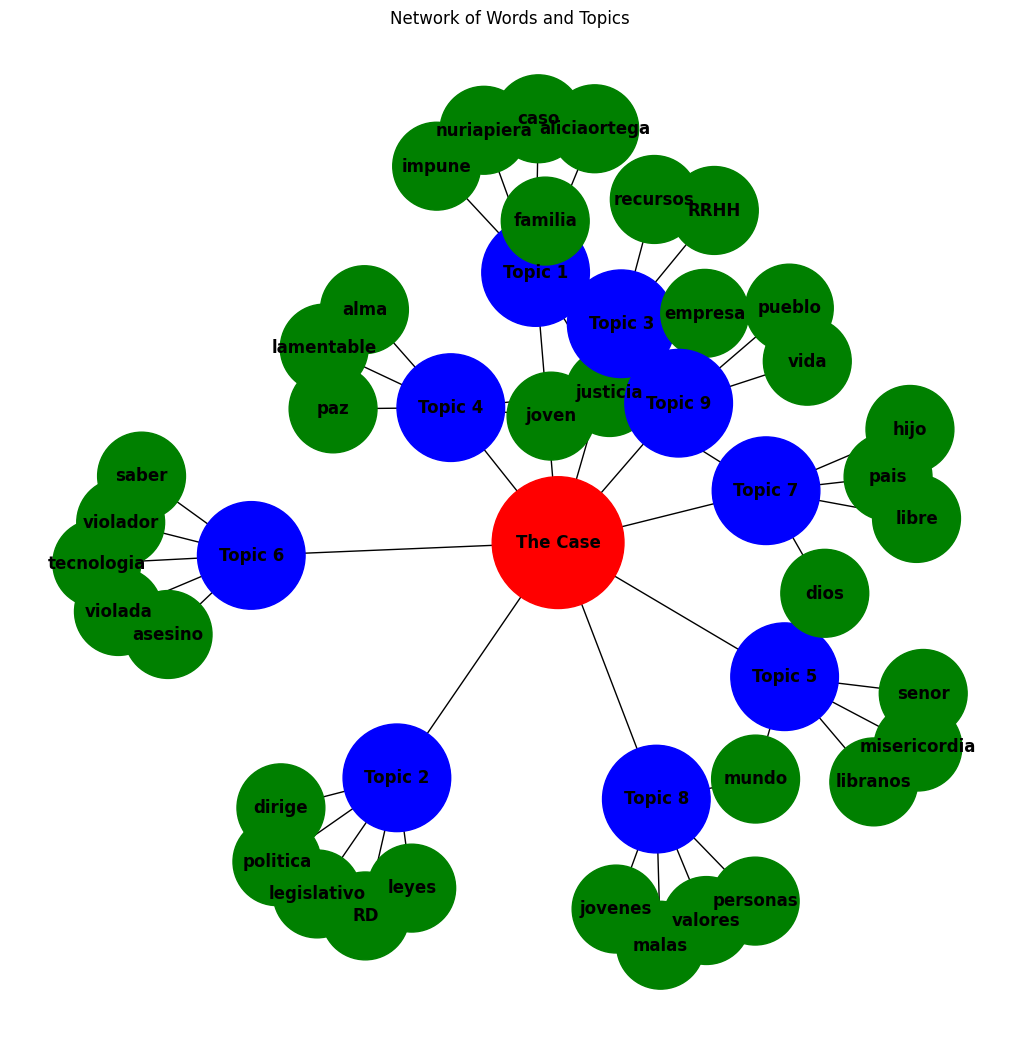

In [85]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations


# Sample top words for each topic
top_words = [
    ['impune', 'justicia', 'caso', 'nuriapiera', 'aliciaortega'],
    ['politica', 'RD', 'leyes', 'legislativo', 'dirige'],
    ['empresa', 'RRHH', 'familia', 'recursos', 'justicia'],
    ['paz', 'alma', 'joven', 'justicia', 'lamentable'],
    ['misericordia', 'dios', 'senor', 'mundo', 'libranos'],
    ['violada', 'asesino', 'tecnologia', 'violador', 'saber'],
    ['dios', 'justicia', 'pais', 'hijo', 'libre'],
    ['mundo', 'personas', 'malas', 'jovenes', 'valores'],
    ['justicia', 'empresa', 'pueblo', 'joven', 'vida']
]


# Create graph
G = nx.Graph()

# Add "The Case" as the central node
G.add_node("The Case", level=0)

# Add nodes for each topic and connect them to "The Case"
for i, words in enumerate(top_words):
    topic_name = f"Topic {i+1}"
    G.add_node(topic_name, level=1)
    G.add_edge("The Case", topic_name)
    for word in words:
        G.add_node(word, level=2)
        G.add_edge(topic_name, word)

# Define colors and sizes based on node levels
node_colors = []
node_sizes = []
for node in G.nodes():
    level = G.nodes[node]['level']
    if level == 0:
        node_colors.append('red')  # Central node
        node_sizes.append(9000)
    elif level == 1:
        node_colors.append('blue')  # Topic nodes
        node_sizes.append(6000)
    else:
        node_colors.append('green')  # Word nodes
        node_sizes.append(4000)

# Draw network with node colors and sizes
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors,
        font_size=12, font_weight='bold')
plt.title('Network of Words and Topics')
plt.show()

# Conclusion and Final Comments

We can extract meaningful insights about people's perception of crime cases in a specific context. In this project, a case of a crime-news-post was analysed. Paula Santana was a young victim with a motivational story that resonated with a lot of people. The nature of the crime was also a topic of discussion due to the fact the was killed in the installations of her job by a suspect that worked in the company and that she had reported for harassment.

Therefore, the news of her crime generated a lot of reactions from the population. Social media allow us to capture some of these reactions and try to make sense of the common topics that social media users bring to the table.

Some interesting findings refer to the perception of the justice system and how the politician responsibilites in applying the legislations to protect vulnerable people: a young women with dreams and aspirations who could not leave her job even after being harassed. There was also a strong focus on the company's responsibilities. It shows that there should be stronger regulations to ensure that companies abide by the laws and manage harassment cases like this better, to avoid tragedies.

The limitations of my research reside in providing a structure for the analysis that could be improved in order to obtain better results. Also, the interpretation of the results might be biased by my pre-conceived understanding of the topic. A larger sample with different news of different crimes can provide better insights into how people react to different types crime and depending on the typification of the victim. Also, extracting not only the main comments but also the responses, can help us understand how people interact in these type of discussions. Further analysis could identify language patterns and language usage in these contexts and try to generalize to formal concepts that can be useful for policymaking and to motivate social changes.  